## Load libraries

In [252]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import numpy as np
import pandas as pd

# Libraries to cluster data
from sklearn.cluster import DBSCAN, OPTICS

# Libraries to visualize data
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.cm as cm
from cluster_visualization_helper import compute_cluster_visualization, visualize_cluster  # user-defined functions

# Libraries for evaluation
from sklearn import metrics

# Libraries for monitoring operation process
from datetime import datetime
from tqdm import tqdm

%matplotlib inline

## Configurate and declare global variables

In [14]:
os_name = os.name

if os_name == 'nt':
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
elif os_name == 'posix':
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
    
SEED = 6886

## Import data

In [15]:
title_embeddings = np.load(OUTPUT_DIR + "title_embeddings.npy")
title_docs = pd.read_csv(OUTPUT_DIR + "title_docs.csv")

## Check imported data

In [16]:
title_embeddings.shape, title_docs.shape

((18992, 100), (18992, 2))

## Clustering data

### DBSCAN

In [210]:
from sklearn.neighbors import NearestNeighbors

X = title_embeddings

neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

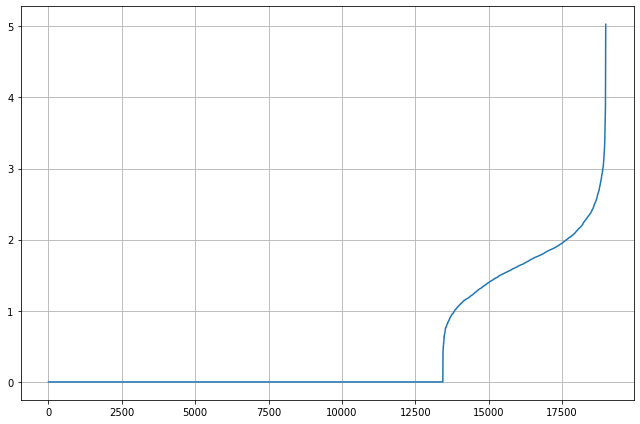

In [211]:
plt.figure(figsize=(9,6))
plt.plot(distances)
plt.grid()
plt.tight_layout()

In [302]:
def dbscan_cluster(X, eps, min_samples):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    clusterer.fit(X)
#     silhouette_score = metrics.silhouette_score(X, clusterer.labels_)
    print(f"Epsilon = {eps:0.2f}")
    print(f"Minimum samples = {min_samples}")
#     print(f"Silhouette coefficient: {silhouette_score:0.5f}")
    return clusterer, clusterer.labels_

In [258]:
# def optics_cluster(X, min_samples, xi, min_cluster_size):
#     clusterer = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05, n_jobs=-1)
#     clusterer.fit(X)
#     return clusterer, clusterer.labels_

In [ ]:
# clusterer, cluster_labels = optics_cluster(
#     X=title_embeddings, min_samples=50, xi=0.05, min_cluster_size=0.05
# )

In [ ]:
# space = np.arange(len(X))
# reachability = clusterer.reachability_[clusterer.ordering_]
# labels = clusterer.labels_[clusterer.ordering_]

# plt.figure(figsize=(10, 7))
# G = gridspec.GridSpec(2, 2)
# ax1 = plt.subplot(G[0, :])
# ax2 = plt.subplot(G[1, 0])

# # Reachability plot
# colors = sns.color_palette('hls', as_cmap=True)
# for klass, color in zip(range(0, len(np.unique(labels))), colors[:len(np.unique(labels))]):
#     Xk = space[labels == klass]
#     Rk = reachability[labels == klass]
#     ax1.plot(Xk, Rk, color, alpha=0.3)
# ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
# # ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
# # ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
# ax1.set_ylabel('Reachability (epsilon distance)')
# ax1.set_title('Reachability Plot')

# # OPTICS
# colors = ['g.', 'r.', 'b.', 'y.', 'c.']
# for klass, color in zip(range(0, len(np.unique(labels))), colors[:len(np.unique(labels))]):
#     Xk = X[clusterer.labels_ == klass]
#     ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
# ax2.plot(X[clusterer.labels_ == -1, 0], X[clusterer.labels_ == -1, 1], 'k+', alpha=0.1)
# ax2.set_title('Automatic Clustering\nOPTICS')

In [358]:
# eps_space = np.arange(0.1, 5.1, 0.5)
# min_smpl_space = range(3, 11)
eps_space = np.arange(0.1, 2.1, 0.1)
min_smpl_space = np.arange(2, 10, 1)
# min_smpl_space = [2,3]
# eps_space = [0.01, 0.05]
# min_smpl_space = [2,3,4]
silho_scores = []
dbsc_list = []
dbsc_labels = []
len(eps_space), len(min_smpl_space), len(min_smpl_space)*len(eps_space)

(20, 8, 160)

In [376]:
eps_list = np.asarray([[i]*len(min_smpl_space) for i in eps_space]).reshape(-1)
# print(eps_list)
min_smpl_list = np.asarray([[min_smpl_space]*len(eps_space)]).reshape(-1)
# print(min_smpl_list)
len(eps_list), len(min_smpl_list)

(160, 160)

In [360]:
# import dbscan_lab_helper as helper
# import importlib
# importlib.reload(helper)

# helper.plot_dataset(X, xlim=(-1.5,1.3), ylim=(-1.5,1.3))

In [361]:
# helper.plot_dbscan_grid(X, eps_space, min_smpl_space)

In [362]:
start_loop_time = datetime.now()
print('Start loop', start_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))

for eps, min_smpl in tqdm(zip(eps_list, min_smpl_list)):
    starttime = datetime.now()
    print('Start', starttime.strftime('%Y-%m-%d %H:%M:%S.%f'))

    clusterer, cluster_labels = dbscan_cluster(
        X=title_embeddings,
        eps=eps,
        min_samples=min_smpl
    )

    endtime = datetime.now()
    print('End', endtime.strftime('%Y-%m-%d %H:%M:%S.%f'))
    print('Duration', endtime - starttime)

    dbsc_list.append(clusterer)
    dbsc_labels.append(cluster_labels)
    silho_scores.append(sil_score)
    print()

end_loop_time = datetime.now()
print('End loop', end_loop_time.strftime('%Y-%m-%d %H:%M:%S.%f'))
print('Duration', end_loop_time - start_loop_time)

0it [00:00, ?it/s]

Start loop 2021-04-26 11:56:23.576626
Start 2021-04-26 11:56:23.578628


1it [00:09,  9.12s/it]

Epsilon = 0.10
Minimum samples = 2
End 2021-04-26 11:56:32.696199
Duration 0:00:09.117571

Start 2021-04-26 11:56:32.697226


2it [00:17,  8.82s/it]

Epsilon = 0.10
Minimum samples = 3
End 2021-04-26 11:56:41.305930
Duration 0:00:08.608704

Start 2021-04-26 11:56:41.306923


3it [00:26,  8.80s/it]

Epsilon = 0.10
Minimum samples = 4
End 2021-04-26 11:56:50.091859
Duration 0:00:08.784936

Start 2021-04-26 11:56:50.091859


4it [00:35,  8.75s/it]

Epsilon = 0.10
Minimum samples = 5
End 2021-04-26 11:56:58.750121
Duration 0:00:08.658262

Start 2021-04-26 11:56:58.751124


5it [00:43,  8.72s/it]

Epsilon = 0.10
Minimum samples = 6
End 2021-04-26 11:57:07.425874
Duration 0:00:08.674750

Start 2021-04-26 11:57:07.426859


6it [00:52,  8.72s/it]

Epsilon = 0.10
Minimum samples = 7
End 2021-04-26 11:57:16.131246
Duration 0:00:08.704387

Start 2021-04-26 11:57:16.132297


7it [01:01,  8.72s/it]

Epsilon = 0.10
Minimum samples = 8
End 2021-04-26 11:57:24.848345
Duration 0:00:08.716048

Start 2021-04-26 11:57:24.849345


8it [01:10,  8.73s/it]

Epsilon = 0.10
Minimum samples = 9
End 2021-04-26 11:57:33.603624
Duration 0:00:08.754279

Start 2021-04-26 11:57:33.604638


9it [01:18,  8.77s/it]

Epsilon = 0.20
Minimum samples = 2
End 2021-04-26 11:57:42.464908
Duration 0:00:08.860270

Start 2021-04-26 11:57:42.465866


10it [01:27,  8.77s/it]

Epsilon = 0.20
Minimum samples = 3
End 2021-04-26 11:57:51.241058
Duration 0:00:08.775192

Start 2021-04-26 11:57:51.242067


11it [01:36,  8.76s/it]

Epsilon = 0.20
Minimum samples = 4
End 2021-04-26 11:57:59.971868
Duration 0:00:08.729801

Start 2021-04-26 11:57:59.972871


12it [01:45,  8.74s/it]

Epsilon = 0.20
Minimum samples = 5
End 2021-04-26 11:58:08.662859
Duration 0:00:08.689988

Start 2021-04-26 11:58:08.662859


13it [01:53,  8.78s/it]

Epsilon = 0.20
Minimum samples = 6
End 2021-04-26 11:58:17.530904
Duration 0:00:08.868045

Start 2021-04-26 11:58:17.531905


14it [02:02,  8.78s/it]

Epsilon = 0.20
Minimum samples = 7
End 2021-04-26 11:58:26.321688
Duration 0:00:08.789783

Start 2021-04-26 11:58:26.322682


15it [02:11,  8.83s/it]

Epsilon = 0.20
Minimum samples = 8
End 2021-04-26 11:58:35.249395
Duration 0:00:08.926713

Start 2021-04-26 11:58:35.250398


16it [02:20,  8.81s/it]

Epsilon = 0.20
Minimum samples = 9
End 2021-04-26 11:58:44.007639
Duration 0:00:08.757241

Start 2021-04-26 11:58:44.008593


17it [02:29,  8.81s/it]

Epsilon = 0.30
Minimum samples = 2
End 2021-04-26 11:58:52.827052
Duration 0:00:08.818459

Start 2021-04-26 11:58:52.827052


18it [02:37,  8.78s/it]

Epsilon = 0.30
Minimum samples = 3
End 2021-04-26 11:59:01.544768
Duration 0:00:08.717716

Start 2021-04-26 11:59:01.544768


19it [02:46,  8.79s/it]

Epsilon = 0.30
Minimum samples = 4
End 2021-04-26 11:59:10.342842
Duration 0:00:08.798074

Start 2021-04-26 11:59:10.342842


20it [02:55,  8.79s/it]

Epsilon = 0.30
Minimum samples = 5
End 2021-04-26 11:59:19.124799
Duration 0:00:08.781957

Start 2021-04-26 11:59:19.124799


21it [03:04,  8.80s/it]

Epsilon = 0.30
Minimum samples = 6
End 2021-04-26 11:59:27.955900
Duration 0:00:08.831101

Start 2021-04-26 11:59:27.957898


22it [03:13,  8.80s/it]

Epsilon = 0.30
Minimum samples = 7
End 2021-04-26 11:59:36.767828
Duration 0:00:08.809930

Start 2021-04-26 11:59:36.768828


23it [03:21,  8.77s/it]

Epsilon = 0.30
Minimum samples = 8
End 2021-04-26 11:59:45.468260
Duration 0:00:08.699432

Start 2021-04-26 11:59:45.468260


24it [03:30,  8.78s/it]

Epsilon = 0.30
Minimum samples = 9
End 2021-04-26 11:59:54.264305
Duration 0:00:08.796045

Start 2021-04-26 11:59:54.265284


25it [03:39,  8.85s/it]

Epsilon = 0.40
Minimum samples = 2
End 2021-04-26 12:00:03.265789
Duration 0:00:09.000505

Start 2021-04-26 12:00:03.266788


26it [03:48,  8.83s/it]

Epsilon = 0.40
Minimum samples = 3
End 2021-04-26 12:00:12.062276
Duration 0:00:08.795488

Start 2021-04-26 12:00:12.063275


27it [03:57,  8.86s/it]

Epsilon = 0.40
Minimum samples = 4
End 2021-04-26 12:00:20.980297
Duration 0:00:08.917022

Start 2021-04-26 12:00:20.980297


28it [04:06,  8.85s/it]

Epsilon = 0.40
Minimum samples = 5
End 2021-04-26 12:00:29.827782
Duration 0:00:08.847485

Start 2021-04-26 12:00:29.828732


29it [04:15,  8.83s/it]

Epsilon = 0.40
Minimum samples = 6
End 2021-04-26 12:00:38.588119
Duration 0:00:08.759387

Start 2021-04-26 12:00:38.588119


30it [04:23,  8.79s/it]

Epsilon = 0.40
Minimum samples = 7
End 2021-04-26 12:00:47.309820
Duration 0:00:08.721701

Start 2021-04-26 12:00:47.309820


31it [04:32,  8.77s/it]

Epsilon = 0.40
Minimum samples = 8
End 2021-04-26 12:00:56.020710
Duration 0:00:08.710890

Start 2021-04-26 12:00:56.021680


32it [04:41,  8.78s/it]

Epsilon = 0.40
Minimum samples = 9
End 2021-04-26 12:01:04.813546
Duration 0:00:08.791866

Start 2021-04-26 12:01:04.814547


33it [04:50,  8.77s/it]

Epsilon = 0.50
Minimum samples = 2
End 2021-04-26 12:01:13.579514
Duration 0:00:08.764967

Start 2021-04-26 12:01:13.580473


34it [04:58,  8.78s/it]

Epsilon = 0.50
Minimum samples = 3
End 2021-04-26 12:01:22.369043
Duration 0:00:08.788570

Start 2021-04-26 12:01:22.371045


35it [05:07,  8.78s/it]

Epsilon = 0.50
Minimum samples = 4
End 2021-04-26 12:01:31.164046
Duration 0:00:08.793001

Start 2021-04-26 12:01:31.164046


36it [05:16,  8.78s/it]

Epsilon = 0.50
Minimum samples = 5
End 2021-04-26 12:01:39.938002
Duration 0:00:08.773956

Start 2021-04-26 12:01:39.938986


37it [05:25,  8.79s/it]

Epsilon = 0.50
Minimum samples = 6
End 2021-04-26 12:01:48.745109
Duration 0:00:08.806123

Start 2021-04-26 12:01:48.746107


38it [05:33,  8.79s/it]

Epsilon = 0.50
Minimum samples = 7
End 2021-04-26 12:01:57.524831
Duration 0:00:08.778724

Start 2021-04-26 12:01:57.526801


39it [05:42,  8.81s/it]

Epsilon = 0.50
Minimum samples = 8
End 2021-04-26 12:02:06.402778
Duration 0:00:08.875977

Start 2021-04-26 12:02:06.402778


40it [05:51,  8.83s/it]

Epsilon = 0.50
Minimum samples = 9
End 2021-04-26 12:02:15.266130
Duration 0:00:08.863352

Start 2021-04-26 12:02:15.266130


41it [06:00,  8.81s/it]

Epsilon = 0.60
Minimum samples = 2
End 2021-04-26 12:02:24.043756
Duration 0:00:08.777626

Start 2021-04-26 12:02:24.044727


42it [06:09,  8.81s/it]

Epsilon = 0.60
Minimum samples = 3
End 2021-04-26 12:02:32.836507
Duration 0:00:08.791780

Start 2021-04-26 12:02:32.836507


43it [06:18,  8.81s/it]

Epsilon = 0.60
Minimum samples = 4
End 2021-04-26 12:02:41.666140
Duration 0:00:08.829633

Start 2021-04-26 12:02:41.667136


44it [06:26,  8.80s/it]

Epsilon = 0.60
Minimum samples = 5
End 2021-04-26 12:02:50.429738
Duration 0:00:08.762602

Start 2021-04-26 12:02:50.430690


45it [06:35,  8.80s/it]

Epsilon = 0.60
Minimum samples = 6
End 2021-04-26 12:02:59.234669
Duration 0:00:08.803979

Start 2021-04-26 12:02:59.235629


46it [06:44,  8.79s/it]

Epsilon = 0.60
Minimum samples = 7
End 2021-04-26 12:03:08.003512
Duration 0:00:08.767883

Start 2021-04-26 12:03:08.003512


47it [06:53,  8.81s/it]

Epsilon = 0.60
Minimum samples = 8
End 2021-04-26 12:03:16.844485
Duration 0:00:08.840973

Start 2021-04-26 12:03:16.845439


48it [07:02,  8.79s/it]

Epsilon = 0.60
Minimum samples = 9
End 2021-04-26 12:03:25.603177
Duration 0:00:08.757738

Start 2021-04-26 12:03:25.603177


49it [07:10,  8.82s/it]

Epsilon = 0.70
Minimum samples = 2
End 2021-04-26 12:03:34.483652
Duration 0:00:08.880475

Start 2021-04-26 12:03:34.483652


50it [07:19,  8.82s/it]

Epsilon = 0.70
Minimum samples = 3
End 2021-04-26 12:03:43.323592
Duration 0:00:08.839940

Start 2021-04-26 12:03:43.324548


51it [07:28,  8.81s/it]

Epsilon = 0.70
Minimum samples = 4
End 2021-04-26 12:03:52.110951
Duration 0:00:08.786403

Start 2021-04-26 12:03:52.111908


52it [07:37,  8.81s/it]

Epsilon = 0.70
Minimum samples = 5
End 2021-04-26 12:04:00.901320
Duration 0:00:08.789412

Start 2021-04-26 12:04:00.902285


53it [07:46,  8.80s/it]

Epsilon = 0.70
Minimum samples = 6
End 2021-04-26 12:04:09.697322
Duration 0:00:08.795037

Start 2021-04-26 12:04:09.698370


54it [07:54,  8.80s/it]

Epsilon = 0.70
Minimum samples = 7
End 2021-04-26 12:04:18.481379
Duration 0:00:08.783009

Start 2021-04-26 12:04:18.482336


55it [08:03,  8.81s/it]

Epsilon = 0.70
Minimum samples = 8
End 2021-04-26 12:04:27.306225
Duration 0:00:08.823889

Start 2021-04-26 12:04:27.307197


56it [08:12,  8.81s/it]

Epsilon = 0.70
Minimum samples = 9
End 2021-04-26 12:04:36.134033
Duration 0:00:08.826836

Start 2021-04-26 12:04:36.134982


57it [08:21,  8.80s/it]

Epsilon = 0.80
Minimum samples = 2
End 2021-04-26 12:04:44.894523
Duration 0:00:08.759541

Start 2021-04-26 12:04:44.894523


58it [08:30,  8.81s/it]

Epsilon = 0.80
Minimum samples = 3
End 2021-04-26 12:04:53.724782
Duration 0:00:08.830259

Start 2021-04-26 12:04:53.725782


59it [08:39,  8.84s/it]

Epsilon = 0.80
Minimum samples = 4
End 2021-04-26 12:05:02.626292
Duration 0:00:08.900510

Start 2021-04-26 12:05:02.628241


60it [08:47,  8.83s/it]

Epsilon = 0.80
Minimum samples = 5
End 2021-04-26 12:05:11.460798
Duration 0:00:08.832557

Start 2021-04-26 12:05:11.460798


61it [08:56,  8.89s/it]

Epsilon = 0.80
Minimum samples = 6
End 2021-04-26 12:05:20.477313
Duration 0:00:09.016515

Start 2021-04-26 12:05:20.478267


62it [09:05,  8.82s/it]

Epsilon = 0.80
Minimum samples = 7
End 2021-04-26 12:05:29.148543
Duration 0:00:08.670276

Start 2021-04-26 12:05:29.148543


63it [09:14,  8.81s/it]

Epsilon = 0.80
Minimum samples = 8
End 2021-04-26 12:05:37.931855
Duration 0:00:08.783312

Start 2021-04-26 12:05:37.932883


64it [09:23,  8.82s/it]

Epsilon = 0.80
Minimum samples = 9
End 2021-04-26 12:05:46.759597
Duration 0:00:08.826714

Start 2021-04-26 12:05:46.760597


65it [09:32,  8.85s/it]

Epsilon = 0.90
Minimum samples = 2
End 2021-04-26 12:05:55.687367
Duration 0:00:08.926770

Start 2021-04-26 12:05:55.688315


66it [09:41,  8.88s/it]

Epsilon = 0.90
Minimum samples = 3
End 2021-04-26 12:06:04.625947
Duration 0:00:08.937632

Start 2021-04-26 12:06:04.626947


67it [09:49,  8.84s/it]

Epsilon = 0.90
Minimum samples = 4
End 2021-04-26 12:06:13.391821
Duration 0:00:08.764874

Start 2021-04-26 12:06:13.393795


68it [09:58,  8.82s/it]

Epsilon = 0.90
Minimum samples = 5
End 2021-04-26 12:06:22.163146
Duration 0:00:08.769351

Start 2021-04-26 12:06:22.164104


69it [10:07,  8.82s/it]

Epsilon = 0.90
Minimum samples = 6
End 2021-04-26 12:06:30.985075
Duration 0:00:08.820971

Start 2021-04-26 12:06:30.986028


70it [10:16,  8.81s/it]

Epsilon = 0.90
Minimum samples = 7
End 2021-04-26 12:06:39.776397
Duration 0:00:08.790369

Start 2021-04-26 12:06:39.777350


71it [10:24,  8.81s/it]

Epsilon = 0.90
Minimum samples = 8
End 2021-04-26 12:06:48.568865
Duration 0:00:08.791515

Start 2021-04-26 12:06:48.569867


72it [10:33,  8.80s/it]

Epsilon = 0.90
Minimum samples = 9
End 2021-04-26 12:06:57.350907
Duration 0:00:08.781040

Start 2021-04-26 12:06:57.351863


73it [10:42,  8.79s/it]

Epsilon = 1.00
Minimum samples = 2
End 2021-04-26 12:07:06.112048
Duration 0:00:08.760185

Start 2021-04-26 12:07:06.113050


74it [10:51,  8.79s/it]

Epsilon = 1.00
Minimum samples = 3
End 2021-04-26 12:07:14.909082
Duration 0:00:08.796032

Start 2021-04-26 12:07:14.910048


75it [11:00,  8.80s/it]

Epsilon = 1.00
Minimum samples = 4
End 2021-04-26 12:07:23.744877
Duration 0:00:08.834829

Start 2021-04-26 12:07:23.744877


76it [11:08,  8.80s/it]

Epsilon = 1.00
Minimum samples = 5
End 2021-04-26 12:07:32.542796
Duration 0:00:08.797919

Start 2021-04-26 12:07:32.543752


77it [11:17,  8.82s/it]

Epsilon = 1.00
Minimum samples = 6
End 2021-04-26 12:07:41.420650
Duration 0:00:08.876898

Start 2021-04-26 12:07:41.421606


78it [11:26,  8.83s/it]

Epsilon = 1.00
Minimum samples = 7
End 2021-04-26 12:07:50.258571
Duration 0:00:08.836965

Start 2021-04-26 12:07:50.258571


79it [11:35,  8.82s/it]

Epsilon = 1.00
Minimum samples = 8
End 2021-04-26 12:07:59.047136
Duration 0:00:08.788565

Start 2021-04-26 12:07:59.048138


80it [11:44,  8.80s/it]

Epsilon = 1.00
Minimum samples = 9
End 2021-04-26 12:08:07.803133
Duration 0:00:08.754995

Start 2021-04-26 12:08:07.804134


81it [11:53,  8.80s/it]

Epsilon = 1.10
Minimum samples = 2
End 2021-04-26 12:08:16.603619
Duration 0:00:08.799485

Start 2021-04-26 12:08:16.604574


82it [12:01,  8.79s/it]

Epsilon = 1.10
Minimum samples = 3
End 2021-04-26 12:08:25.386422
Duration 0:00:08.781848

Start 2021-04-26 12:08:25.386422


83it [12:10,  8.77s/it]

Epsilon = 1.10
Minimum samples = 4
End 2021-04-26 12:08:34.094054
Duration 0:00:08.707632

Start 2021-04-26 12:08:34.095082


84it [12:19,  8.80s/it]

Epsilon = 1.10
Minimum samples = 5
End 2021-04-26 12:08:42.971092
Duration 0:00:08.876010

Start 2021-04-26 12:08:42.971092


85it [12:28,  8.80s/it]

Epsilon = 1.10
Minimum samples = 6
End 2021-04-26 12:08:51.778378
Duration 0:00:08.807286

Start 2021-04-26 12:08:51.779403


86it [12:37,  8.82s/it]

Epsilon = 1.10
Minimum samples = 7
End 2021-04-26 12:09:00.646253
Duration 0:00:08.866850

Start 2021-04-26 12:09:00.647305


87it [12:45,  8.82s/it]

Epsilon = 1.10
Minimum samples = 8
End 2021-04-26 12:09:09.448727
Duration 0:00:08.801422

Start 2021-04-26 12:09:09.448727


88it [12:54,  8.80s/it]

Epsilon = 1.10
Minimum samples = 9
End 2021-04-26 12:09:18.211429
Duration 0:00:08.762702

Start 2021-04-26 12:09:18.211429


89it [13:03,  8.77s/it]

Epsilon = 1.20
Minimum samples = 2
End 2021-04-26 12:09:26.925808
Duration 0:00:08.714379

Start 2021-04-26 12:09:26.926811


90it [13:12,  8.74s/it]

Epsilon = 1.20
Minimum samples = 3
End 2021-04-26 12:09:35.579339
Duration 0:00:08.652528

Start 2021-04-26 12:09:35.580340


91it [13:20,  8.79s/it]

Epsilon = 1.20
Minimum samples = 4
End 2021-04-26 12:09:44.500580
Duration 0:00:08.920240

Start 2021-04-26 12:09:44.501580


92it [13:29,  8.78s/it]

Epsilon = 1.20
Minimum samples = 5
End 2021-04-26 12:09:53.260745
Duration 0:00:08.759165

Start 2021-04-26 12:09:53.261698


93it [13:38,  8.79s/it]

Epsilon = 1.20
Minimum samples = 6
End 2021-04-26 12:10:02.067248
Duration 0:00:08.805550

Start 2021-04-26 12:10:02.069206


94it [13:47,  8.81s/it]

Epsilon = 1.20
Minimum samples = 7
End 2021-04-26 12:10:10.918760
Duration 0:00:08.849554

Start 2021-04-26 12:10:10.919795


95it [13:56,  8.79s/it]

Epsilon = 1.20
Minimum samples = 8
End 2021-04-26 12:10:19.681047
Duration 0:00:08.761252

Start 2021-04-26 12:10:19.682074


96it [14:04,  8.82s/it]

Epsilon = 1.20
Minimum samples = 9
End 2021-04-26 12:10:28.569822
Duration 0:00:08.887748

Start 2021-04-26 12:10:28.571778


97it [14:15,  9.29s/it]

Epsilon = 1.30
Minimum samples = 2
End 2021-04-26 12:10:38.964431
Duration 0:00:10.392653

Start 2021-04-26 12:10:38.966388


98it [14:24,  9.12s/it]

Epsilon = 1.30
Minimum samples = 3
End 2021-04-26 12:10:47.678238
Duration 0:00:08.711850

Start 2021-04-26 12:10:47.679238


99it [14:32,  9.05s/it]

Epsilon = 1.30
Minimum samples = 4
End 2021-04-26 12:10:56.557414
Duration 0:00:08.878176

Start 2021-04-26 12:10:56.558364


100it [14:41,  8.97s/it]

Epsilon = 1.30
Minimum samples = 5
End 2021-04-26 12:11:05.360607
Duration 0:00:08.802243

Start 2021-04-26 12:11:05.361606


101it [14:50,  8.93s/it]

Epsilon = 1.30
Minimum samples = 6
End 2021-04-26 12:11:14.176027
Duration 0:00:08.814421

Start 2021-04-26 12:11:14.177061


102it [14:59,  8.85s/it]

Epsilon = 1.30
Minimum samples = 7
End 2021-04-26 12:11:22.859289
Duration 0:00:08.682228

Start 2021-04-26 12:11:22.859289


103it [15:08,  8.83s/it]

Epsilon = 1.30
Minimum samples = 8
End 2021-04-26 12:11:31.630745
Duration 0:00:08.771456

Start 2021-04-26 12:11:31.630745


104it [15:16,  8.84s/it]

Epsilon = 1.30
Minimum samples = 9
End 2021-04-26 12:11:40.506527
Duration 0:00:08.875782

Start 2021-04-26 12:11:40.507528


105it [15:26,  8.93s/it]

Epsilon = 1.40
Minimum samples = 2
End 2021-04-26 12:11:49.627053
Duration 0:00:09.119525

Start 2021-04-26 12:11:49.628052


106it [15:34,  8.91s/it]

Epsilon = 1.40
Minimum samples = 3
End 2021-04-26 12:11:58.508990
Duration 0:00:08.880938

Start 2021-04-26 12:11:58.508990


107it [15:43,  8.88s/it]

Epsilon = 1.40
Minimum samples = 4
End 2021-04-26 12:12:07.317145
Duration 0:00:08.808155

Start 2021-04-26 12:12:07.318100


108it [15:52,  8.86s/it]

Epsilon = 1.40
Minimum samples = 5
End 2021-04-26 12:12:16.139145
Duration 0:00:08.821045

Start 2021-04-26 12:12:16.140100


109it [16:01,  8.83s/it]

Epsilon = 1.40
Minimum samples = 6
End 2021-04-26 12:12:24.876976
Duration 0:00:08.736876

Start 2021-04-26 12:12:24.877930


110it [16:10,  8.83s/it]

Epsilon = 1.40
Minimum samples = 7
End 2021-04-26 12:12:33.706832
Duration 0:00:08.828902

Start 2021-04-26 12:12:33.707815


111it [16:18,  8.83s/it]

Epsilon = 1.40
Minimum samples = 8
End 2021-04-26 12:12:42.535241
Duration 0:00:08.827426

Start 2021-04-26 12:12:42.536194


112it [16:27,  8.85s/it]

Epsilon = 1.40
Minimum samples = 9
End 2021-04-26 12:12:51.422996
Duration 0:00:08.886802

Start 2021-04-26 12:12:51.423951


113it [16:36,  8.83s/it]

Epsilon = 1.50
Minimum samples = 2
End 2021-04-26 12:13:00.224865
Duration 0:00:08.800914

Start 2021-04-26 12:13:00.225869


114it [16:45,  8.81s/it]

Epsilon = 1.50
Minimum samples = 3
End 2021-04-26 12:13:08.992912
Duration 0:00:08.767043

Start 2021-04-26 12:13:08.993868


115it [16:54,  8.79s/it]

Epsilon = 1.50
Minimum samples = 4
End 2021-04-26 12:13:17.713865
Duration 0:00:08.719997

Start 2021-04-26 12:13:17.713865


116it [17:03,  8.86s/it]

Epsilon = 1.50
Minimum samples = 5
End 2021-04-26 12:13:26.735489
Duration 0:00:09.021624

Start 2021-04-26 12:13:26.736486


117it [17:11,  8.83s/it]

Epsilon = 1.50
Minimum samples = 6
End 2021-04-26 12:13:35.495829
Duration 0:00:08.759343

Start 2021-04-26 12:13:35.496830


118it [17:20,  8.85s/it]

Epsilon = 1.50
Minimum samples = 7
End 2021-04-26 12:13:44.382846
Duration 0:00:08.886016

Start 2021-04-26 12:13:44.384814


119it [17:29,  8.84s/it]

Epsilon = 1.50
Minimum samples = 8
End 2021-04-26 12:13:53.215314
Duration 0:00:08.830500

Start 2021-04-26 12:13:53.216268


120it [17:38,  8.87s/it]

Epsilon = 1.50
Minimum samples = 9
End 2021-04-26 12:14:02.141083
Duration 0:00:08.924815

Start 2021-04-26 12:14:02.142041


121it [17:47,  8.82s/it]

Epsilon = 1.60
Minimum samples = 2
End 2021-04-26 12:14:10.852560
Duration 0:00:08.710519

Start 2021-04-26 12:14:10.853562


122it [17:56,  8.82s/it]

Epsilon = 1.60
Minimum samples = 3
End 2021-04-26 12:14:19.685190
Duration 0:00:08.831628

Start 2021-04-26 12:14:19.687190


123it [18:04,  8.83s/it]

Epsilon = 1.60
Minimum samples = 4
End 2021-04-26 12:14:28.517190
Duration 0:00:08.830000

Start 2021-04-26 12:14:28.518199


124it [18:13,  8.85s/it]

Epsilon = 1.60
Minimum samples = 5
End 2021-04-26 12:14:37.409204
Duration 0:00:08.891005

Start 2021-04-26 12:14:37.410222


125it [18:22,  8.84s/it]

Epsilon = 1.60
Minimum samples = 6
End 2021-04-26 12:14:46.239569
Duration 0:00:08.829347

Start 2021-04-26 12:14:46.241526


126it [18:31,  8.81s/it]

Epsilon = 1.60
Minimum samples = 7
End 2021-04-26 12:14:54.975009
Duration 0:00:08.733483

Start 2021-04-26 12:14:54.976010


127it [18:40,  8.80s/it]

Epsilon = 1.60
Minimum samples = 8
End 2021-04-26 12:15:03.756861
Duration 0:00:08.780851

Start 2021-04-26 12:15:03.757881


128it [18:49,  8.81s/it]

Epsilon = 1.60
Minimum samples = 9
End 2021-04-26 12:15:12.588470
Duration 0:00:08.830589

Start 2021-04-26 12:15:12.588470


129it [18:57,  8.81s/it]

Epsilon = 1.70
Minimum samples = 2
End 2021-04-26 12:15:21.413452
Duration 0:00:08.824982

Start 2021-04-26 12:15:21.414442


130it [19:06,  8.84s/it]

Epsilon = 1.70
Minimum samples = 3
End 2021-04-26 12:15:30.309459
Duration 0:00:08.895017

Start 2021-04-26 12:15:30.310413


131it [19:15,  8.83s/it]

Epsilon = 1.70
Minimum samples = 4
End 2021-04-26 12:15:39.121563
Duration 0:00:08.811150

Start 2021-04-26 12:15:39.122636


132it [19:24,  8.86s/it]

Epsilon = 1.70
Minimum samples = 5
End 2021-04-26 12:15:48.062928
Duration 0:00:08.940292

Start 2021-04-26 12:15:48.063928


133it [19:33,  8.86s/it]

Epsilon = 1.70
Minimum samples = 6
End 2021-04-26 12:15:56.904953
Duration 0:00:08.841025

Start 2021-04-26 12:15:56.905954


134it [19:42,  8.83s/it]

Epsilon = 1.70
Minimum samples = 7
End 2021-04-26 12:16:05.672826
Duration 0:00:08.766872

Start 2021-04-26 12:16:05.673826


135it [19:50,  8.80s/it]

Epsilon = 1.70
Minimum samples = 8
End 2021-04-26 12:16:14.385954
Duration 0:00:08.712128

Start 2021-04-26 12:16:14.386956


136it [19:59,  8.79s/it]

Epsilon = 1.70
Minimum samples = 9
End 2021-04-26 12:16:23.170054
Duration 0:00:08.783098

Start 2021-04-26 12:16:23.171005


137it [20:08,  8.79s/it]

Epsilon = 1.80
Minimum samples = 2
End 2021-04-26 12:16:31.950791
Duration 0:00:08.779786

Start 2021-04-26 12:16:31.951775


138it [20:17,  8.81s/it]

Epsilon = 1.80
Minimum samples = 3
End 2021-04-26 12:16:40.796000
Duration 0:00:08.844225

Start 2021-04-26 12:16:40.796948


139it [20:25,  8.79s/it]

Epsilon = 1.80
Minimum samples = 4
End 2021-04-26 12:16:49.553015
Duration 0:00:08.756067

Start 2021-04-26 12:16:49.553973


140it [20:34,  8.81s/it]

Epsilon = 1.80
Minimum samples = 5
End 2021-04-26 12:16:58.419327
Duration 0:00:08.865354

Start 2021-04-26 12:16:58.420334


141it [20:43,  8.83s/it]

Epsilon = 1.80
Minimum samples = 6
End 2021-04-26 12:17:07.273223
Duration 0:00:08.852889

Start 2021-04-26 12:17:07.274224


142it [20:52,  8.82s/it]

Epsilon = 1.80
Minimum samples = 7
End 2021-04-26 12:17:16.096765
Duration 0:00:08.822541

Start 2021-04-26 12:17:16.096765


143it [21:01,  8.82s/it]

Epsilon = 1.80
Minimum samples = 8
End 2021-04-26 12:17:24.899283
Duration 0:00:08.802518

Start 2021-04-26 12:17:24.900271


144it [21:10,  8.83s/it]

Epsilon = 1.80
Minimum samples = 9
End 2021-04-26 12:17:33.758574
Duration 0:00:08.858303

Start 2021-04-26 12:17:33.759607


145it [21:19,  8.85s/it]

Epsilon = 1.90
Minimum samples = 2
End 2021-04-26 12:17:42.663980
Duration 0:00:08.904373

Start 2021-04-26 12:17:42.664977


146it [21:27,  8.86s/it]

Epsilon = 1.90
Minimum samples = 3
End 2021-04-26 12:17:51.525500
Duration 0:00:08.860523

Start 2021-04-26 12:17:51.525500


147it [21:36,  8.86s/it]

Epsilon = 1.90
Minimum samples = 4
End 2021-04-26 12:18:00.387843
Duration 0:00:08.862343

Start 2021-04-26 12:18:00.388881


148it [21:45,  8.84s/it]

Epsilon = 1.90
Minimum samples = 5
End 2021-04-26 12:18:09.197902
Duration 0:00:08.809021

Start 2021-04-26 12:18:09.198955


149it [21:54,  8.83s/it]

Epsilon = 1.90
Minimum samples = 6
End 2021-04-26 12:18:18.002481
Duration 0:00:08.803526

Start 2021-04-26 12:18:18.003482


150it [22:03,  8.84s/it]

Epsilon = 1.90
Minimum samples = 7
End 2021-04-26 12:18:26.875650
Duration 0:00:08.872168

Start 2021-04-26 12:18:26.875650


151it [22:12,  8.84s/it]

Epsilon = 1.90
Minimum samples = 8
End 2021-04-26 12:18:35.696671
Duration 0:00:08.821021

Start 2021-04-26 12:18:35.698647


152it [22:21,  8.86s/it]

Epsilon = 1.90
Minimum samples = 9
End 2021-04-26 12:18:44.600531
Duration 0:00:08.901884

Start 2021-04-26 12:18:44.601533


153it [22:29,  8.83s/it]

Epsilon = 2.00
Minimum samples = 2
End 2021-04-26 12:18:53.370411
Duration 0:00:08.768878

Start 2021-04-26 12:18:53.371333


154it [22:38,  8.80s/it]

Epsilon = 2.00
Minimum samples = 3
End 2021-04-26 12:19:02.113348
Duration 0:00:08.742015

Start 2021-04-26 12:19:02.114347


155it [22:47,  8.82s/it]

Epsilon = 2.00
Minimum samples = 4
End 2021-04-26 12:19:10.973606
Duration 0:00:08.859259

Start 2021-04-26 12:19:10.974632


156it [22:56,  8.81s/it]

Epsilon = 2.00
Minimum samples = 5
End 2021-04-26 12:19:19.762262
Duration 0:00:08.787630

Start 2021-04-26 12:19:19.763263


157it [23:04,  8.81s/it]

Epsilon = 2.00
Minimum samples = 6
End 2021-04-26 12:19:28.559215
Duration 0:00:08.795952

Start 2021-04-26 12:19:28.559215


158it [23:13,  8.86s/it]

Epsilon = 2.00
Minimum samples = 7
End 2021-04-26 12:19:37.526901
Duration 0:00:08.967686

Start 2021-04-26 12:19:37.527852


159it [23:22,  8.87s/it]

Epsilon = 2.00
Minimum samples = 8
End 2021-04-26 12:19:46.437143
Duration 0:00:08.909291

Start 2021-04-26 12:19:46.437143


160it [23:31,  8.82s/it]

Epsilon = 2.00
Minimum samples = 9
End 2021-04-26 12:19:55.374443
Duration 0:00:08.937300

End loop 2021-04-26 12:19:55.379404
Duration 0:23:31.802778


In [363]:
calhar_scores = []
davbou_scores = []
silho_scores = []
for i in tqdm(range(len(dbsc_labels))):
    cluster_labels = dbsc_labels[i]
    try:
        silhouette_score = metrics.silhouette_score(X, cluster_labels)
    except Exception as error:
        silhouette_score = -2
        print(error)
    try:
        ch_score = metrics.calinski_harabasz_score(X, cluster_labels)
    except Exception as error:
        ch_score = -2
        print(error)
    try:
        db_score = metrics.davies_bouldin_score(X, cluster_labels)
    except Exception as error:
        db_score = -2
        print(error)
        
    silho_scores.append(silhouette_score)
    calhar_scores.append(ch_score)
    davbou_scores.append(db_score)

100%|████████████████████████████████████████████████████████████████████████████████| 160/160 [12:43<00:00,  4.77s/it]


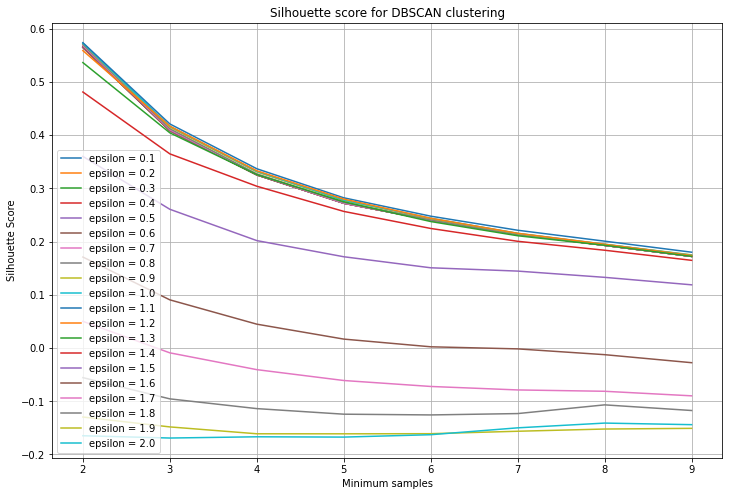

In [364]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot()

# colors = np.arange(1, len(eps_space)+1)
# cmap = cm.nipy_spectral(colors.astype('float')/len(eps_space))
for i in np.arange(1, len(eps_space)+1):
    start = (i-1)*len(min_smpl_space)
    end = i*len(min_smpl_space)
#     print(start, end)
#     print(eps_list)
#     print(min_smpl_list)
    epsilon = eps_list[start]
#     print(epsilon)
#     plt.plot(min_smpl_list[start:end], silho_scores[start:end], label=f"epsilon = {epsilon:.1f}")
    plt.plot(min_smpl_list[start:end], silho_scores[start:end], label=f"epsilon = {epsilon:.1f}")

plt.ylabel("Silhouette Score")
plt.xlabel("Minimum samples")
plt.title("Silhouette score for DBSCAN clustering")
plt.legend()
plt.grid()
plt.show()

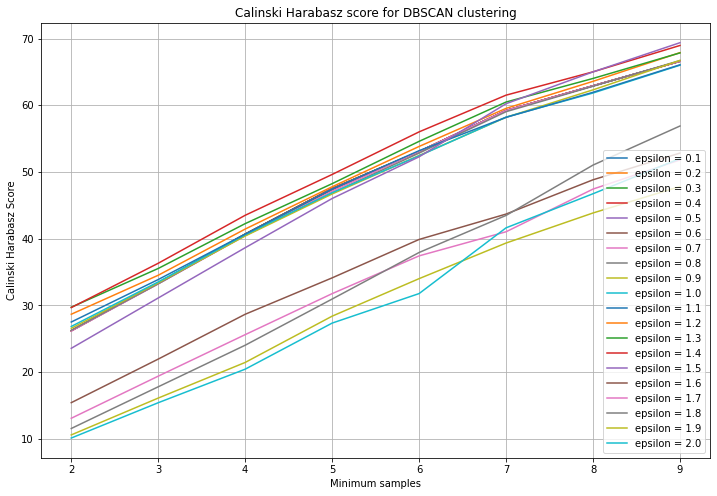

In [365]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot()

# colors = np.arange(1, len(eps_space)+1)
# cmap = cm.nipy_spectral(colors.astype('float')/len(eps_space))
for i in np.arange(1, len(eps_space)+1):
    start = (i-1)*len(min_smpl_space)
    end = i*len(min_smpl_space)
#     print(start, end)
#     print(eps_list)
#     print(min_smpl_list)
    epsilon = eps_list[start]
#     print(epsilon)
#     plt.plot(min_smpl_list[start:end], silho_scores[start:end], label=f"epsilon = {epsilon:.1f}")
    plt.plot(min_smpl_list[start:end], calhar_scores[start:end], label=f"epsilon = {epsilon:.1f}")

plt.ylabel("Calinski Harabasz Score")
plt.xlabel("Minimum samples")
plt.title("Calinski Harabasz score for DBSCAN clustering")
plt.legend()
plt.grid()
plt.show()

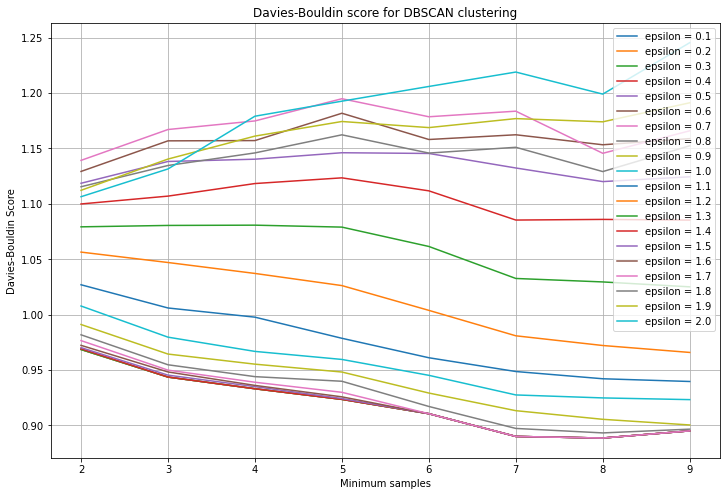

In [366]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot()

# colors = np.arange(1, len(eps_space)+1)
# cmap = cm.nipy_spectral(colors.astype('float')/len(eps_space))
for i in np.arange(1, len(eps_space)+1):
    start = (i-1)*len(min_smpl_space)
    end = i*len(min_smpl_space)
#     print(start, end)
#     print(eps_list)
#     print(min_smpl_list)
    epsilon = eps_list[start]
#     print(epsilon)
#     plt.plot(min_smpl_list[start:end], silho_scores[start:end], label=f"epsilon = {epsilon:.1f}")
    plt.plot(min_smpl_list[start:end], davbou_scores[start:end], label=f"epsilon = {epsilon:.1f}")

plt.ylabel("Davies-Bouldin Score")
plt.xlabel("Minimum samples")
plt.title("Davies-Bouldin score for DBSCAN clustering")
plt.legend()
plt.grid()
plt.show()

In [394]:
X = title_embeddings

best_dbsc_index = np.argmax(silho_scores)
print(best_dbsc_index)

best_dbsc_min_smpl = min_smpl_list[best_dbsc_index]
best_dbsc_eps = eps_list[best_dbsc_index]
print(best_dbsc_min_smpl, best_dbsc_eps)
best_dbsc_labels = dbsc_labels[best_dbsc_index]
best_dbsc_no_clusters = len(np.unique(best_dbsc_labels))
best_dbsc_no_noise = np.sum(np.array(best_dbsc_labels) == -1, axis=0)
print(best_dbsc_no_clusters, best_dbsc_no_noise)

80
2 1.1
2292 4949


In [395]:
df_clusters = pd.DataFrame(
    {
        "text": title_docs["job_title"].values.tolist(),
        "tokens": title_docs["clean_job_title"].values.tolist(),
        "cluster": best_dbsc_labels[best_dbsc_index]
    }
)

In [396]:
df_clusters

,text,tokens,cluster
0,Chief Financial Officer,"['chief', 'financial', 'officer']",32
1,Full-time Community Connections Intern (paid i...,"['full', 'time', 'community', 'connection', 'i...",32
2,Country Coordinator,"['country', 'coordinator']",32
3,BCC Specialist,"['bcc', 'specialist']",32
4,Software Developer,"['software', 'developer']",32
...,...,...,...
18987,Senior Creative UX/ UI Designer,"['senior', 'creative', 'ux', 'ui', 'designer']",32
18988,Category Development Manager,"['category', 'development', 'manager']",32
18989,Operational Marketing Manager,"['operational', 'marketing', 'manager']",32
18990,Head of Online Sales Department,"['head', 'online', 'sale', 'department']",32


In [397]:
# df_clusters.loc[df_clusters['cluster'] == 100]

In [398]:
df_clusters.to_csv(OUTPUT_DIR + "job-title-clusters_dbscan.csv", index=False)

In [400]:
pca_datapoint = np.load(OUTPUT_DIR + "pca_datapoints.npy")
tsne_datapoint = np.load(OUTPUT_DIR + "tsne_datapoints.npy")

Start PCA 2021-04-26 12:40:48.351903
End PCA 2021-04-26 12:40:48.357902
PCA duration 0:00:00.005999

Start t-SNE 2021-04-26 12:40:48.358930
End t-SNE 2021-04-26 12:40:48.362205
t-SNE duration 0:00:00.003275

Wall time: 40.1 ms


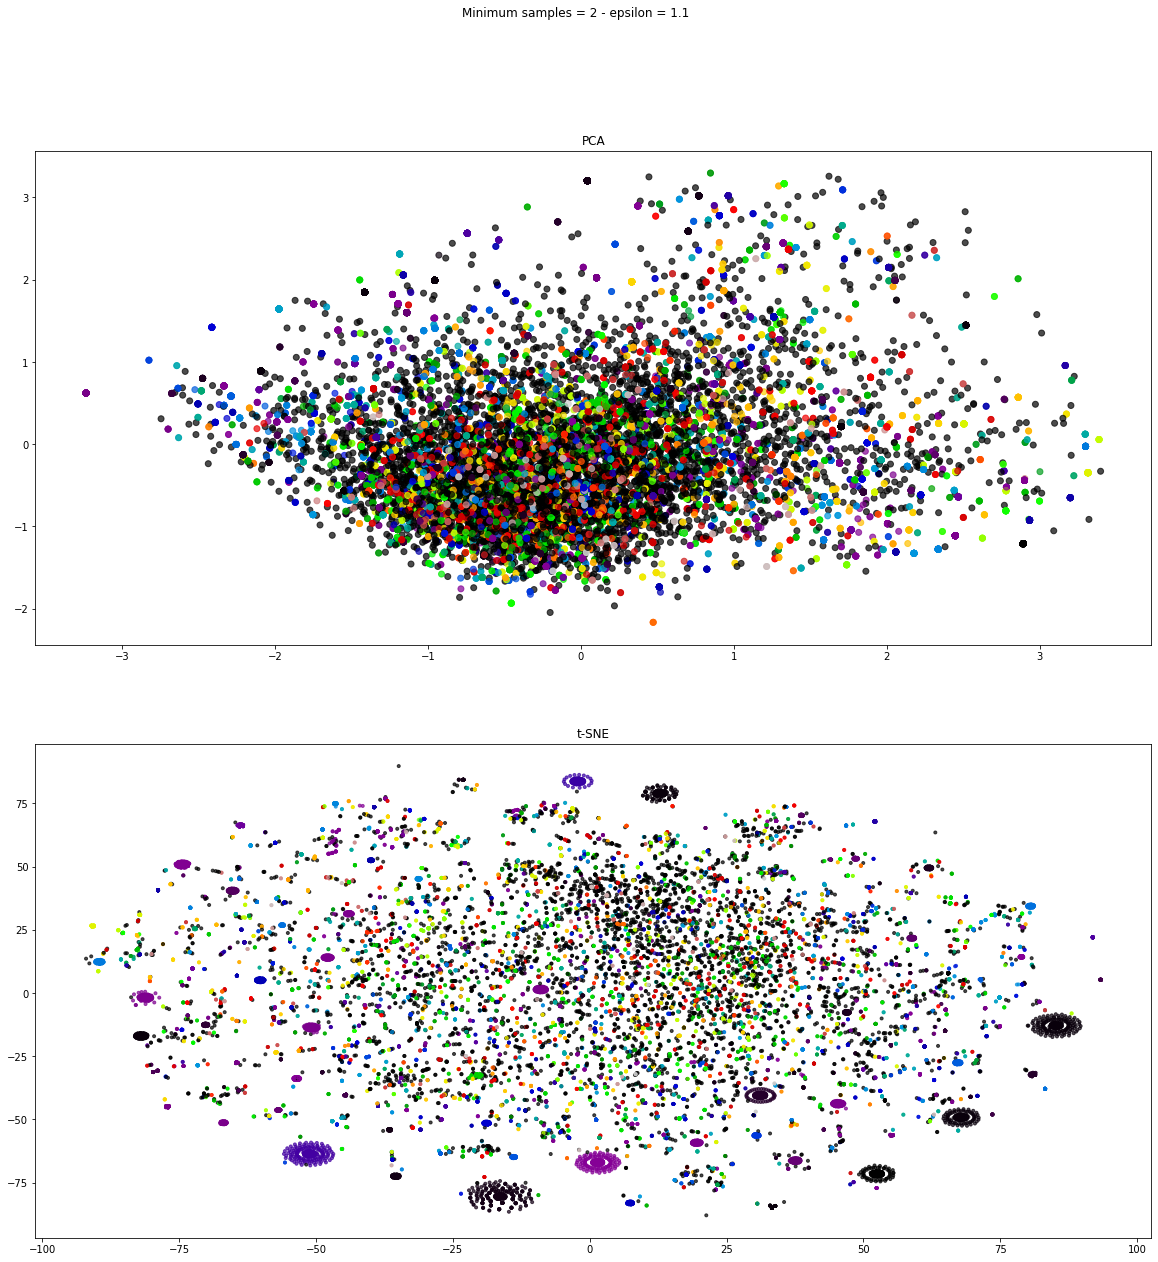

In [401]:
%%time
plot_title = (
    "DBSCAN cluster visualization \n"
    + f"(Optimal number of clusters = {best_dbsc_no_clusters}, "
    + f"minimum samples = {best_dbsc_min_smpl}, "
    + f"epsilon = {best_dbsc_eps})"
)
palette = sns.color_palette("hls", as_cmap=True)
colors = cm.nipy_spectral(best_dbsc_labels.astype(float) / best_dbsc_no_clusters)

# Visualize clusters with PCA and t-SNE
visualize_cluster(
    plot_title,
    (12, 12),
    colors,
    palette,
    pca_datapoint,
    tsne_datapoint,
    pca=True,
    tsne=True,
)